## 偏差与方差
![bias1.png](img/bias1.png)
### 导致偏差的主要原因
对问题本身的假设不对.
如: 非线性数据使用线性回归, 选取的特征和实际结果并没有关系

欠拟合就是其中的一种.

### 导致方差的主要原因
数据的一点点扰动就会较大的影响模型

通常原因是因为使用的模型太复杂.
![bias2.png](img/bias2.png)
![var2.png](img/var2.png)
### 还有模型正则化


# 正则化限制系数的大小

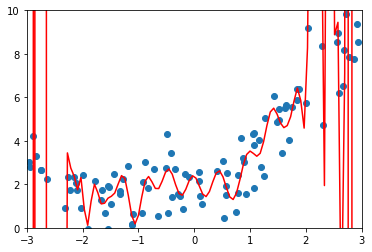

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed = 42
x = np.random.uniform(-3, 3, size= 100)
X = x.reshape(-1, 1)
y = 0.5 * x **2 + x + 2 + np.random.normal(0,1, size=100)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def PolyReg(degree):
    poly_reg = Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
    return poly_reg
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
poly100_reg = PolyReg(100)
poly100_reg.fit(X, y)
y_plot = poly100_reg.predict(X_plot)
plt.scatter(X, y)
plt.axis([-3, 3, 0, 10])
plt.plot(X_plot[:, 0], y_plot, color="r")
plt.show()

![reg1](img/reg1.png)

## 这个也被成为领回归 Ridge Regression

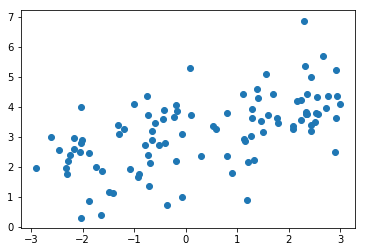

In [2]:
np.random.seed = 42
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0,1, size=100)
plt.scatter(x,y)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=24)

In [4]:
poly_reg = PolyReg(degree=20)
poly_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [5]:
y_predict = poly_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict)

1.0944540196924348

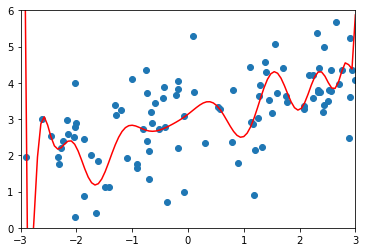

In [6]:
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_plot = poly_reg.predict(X_plot)
plt.scatter(x,y)
plt.plot(X_plot[:, 0], y_plot, color="r")
plt.axis([-3,3,0,6])
plt.show()

In [7]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    plt.scatter(x,y)
    plt.plot(X_plot[:, 0], y_plot, color="r")
    plt.axis([-3,3,0,6])
    plt.show()

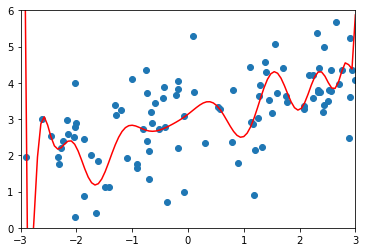

In [8]:
plot_model(poly_reg)

# 使用领回归

In [9]:
from sklearn.linear_model import Ridge

In [10]:
def RidgeReg(degree,alpha):
    poly_reg = Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])
    return poly_reg

In [11]:
ridge_reg1 = RidgeReg(20,0.0001)

In [12]:
ridge_reg1.fit(X_train, y_train)
y1_predict = ridge_reg1.predict(X_test)

In [13]:
mean_squared_error(y_test, y1_predict)

1.125957252640317

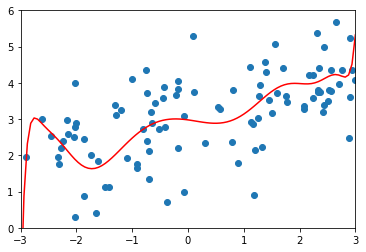

In [14]:
plot_model(ridge_reg1)

In [15]:
ridge_reg2 = RidgeReg(20,1)
ridge_reg2.fit(X_train, y_train)
y2_predict = ridge_reg2.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.0764602873071456

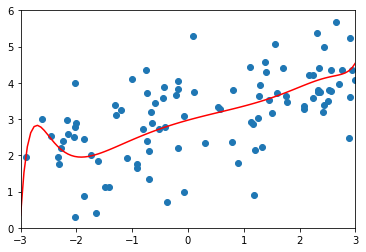

In [16]:
plot_model(ridge_reg2)

In [17]:
ridge_reg3 = RidgeReg(20,100)
ridge_reg3.fit(X_train, y_train)
y3_predict = ridge_reg3.predict(X_test)
mean_squared_error(y_test, y3_predict)

0.9795572900711119

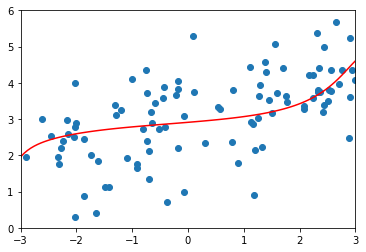

In [18]:
plot_model(ridge_reg3)

In [19]:
ridge_reg4 = RidgeReg(20,100000)
ridge_reg4.fit(X_train, y_train)
y4_predict = ridge_reg4.predict(X_test)
mean_squared_error(y_test, y4_predict)

1.2286013184898226

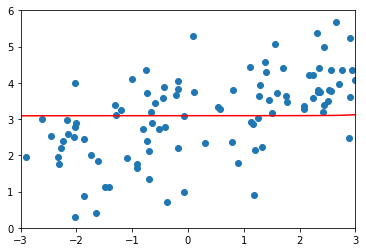

In [20]:
plot_model(ridge_reg4)

# LASSO 回归
Least Absolute Shrinkage and selection operator regression
![lasso.png](img/lasso.png)

In [21]:
from sklearn.linear_model import Lasso
def LassoReg(degree,alpha):
    poly_reg = Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lass_reg", Lasso(alpha=alpha))
    ])
    return poly_reg

In [22]:
lasso1_reg = LassoReg(20, 0.01) # 一个是平方和 一个是绝对值的和

In [23]:
lasso1_reg.fit(X_train, y_train)
y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.0646886986632713

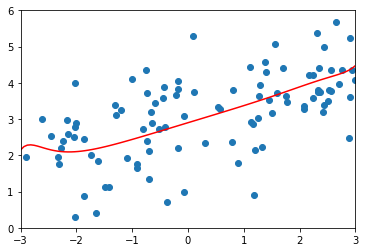

In [24]:
plot_model(lasso1_reg)

In [26]:
lasso2_reg = LassoReg(20, 0.1)
lasso2_reg.fit(X_train, y_train)
y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.998514023634075

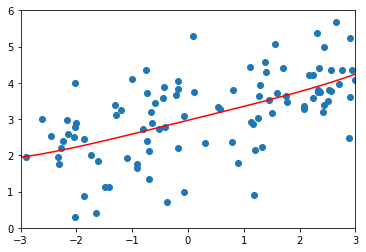

In [27]:
plot_model(lasso2_reg)

In [28]:
lasso3_reg = LassoReg(20, 1)
lasso3_reg.fit(X_train, y_train)
y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.2329033412034125

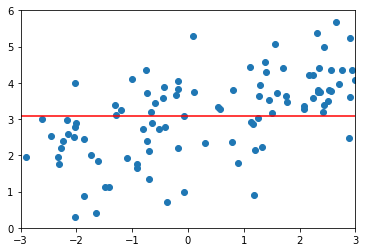

In [29]:
plot_model(lasso3_reg)

# 使用lasso 更倾向于使用直线
也就是倾向于使得一部分theta为0
所以可以作为特征选择的一种方法
Selection operator